In [16]:
import math
import numpy as np

import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 20
mpl.rcParams['font.family'] = 'Times Roman', 'serif'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 24,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt

Matplotbib Version:  3.3.2


In [17]:
def read_energyfile(filename):
    energies = np.loadtxt(filename)
    return energies

#def plot(exact_energies,dt,nsteps,nref,energies1,energies2,energies1_evo,energies1_basis,energies2_evo,energies2_basis,cnvg_energies1,cnvg_energies2,elevel):
    #ax = plt.subplot(111)  
    #ax.spines["top"].set_visible(False)  
    #ax.spines["right"].set_visible(False)
    #plt.rcParams.update({'font.size': 20})
    #plt.grid()
    #t_nbstates1 = np.linspace(0,cnvg_energies1,cnvg_energies1)
    #t_nbstates2 = np.linspace(0,cnvg_energies2,cnvg_energies2)
    #plt.plot(t_nbstates1,energies1[:cnvg_energies1,elevel],marker='s',markersize=12,linewidth=3,linestyle='dashed')
    #plt.plot(t_nbstates2,energies2[:cnvg_energies2,elevel],marker='v',markersize=12,linewidth=3,linestyle='dashed')
    #plt.axhline(y=exact_energies[elevel], color='r', linestyle='-',linewidth=3)
    #plt.xlabel('# of Lanczos Basis States')
    #plt.ylabel('Energy (MeV)')
    #plt.xlim([0, 1])
    #plt.ylim([-32, -18])
    #plt.rcParams['figure.figsize'] = [12.5, 10]
    #if elevel == 0:
    #    plt.legend(['%s, %s, %s ref state'%(energies1_basis,energies1_evo,str(nref)), '%s, %s, %s ref state'%(energies2_basis,energies2_evo,str(nref)), 'Exact Ground State'], loc='upper right', numpoints=1)
    #    plt.title('Ground State, dt = %s'%str(dt))
    #else:
    #    plt.title('Excited State %s, dt = %s'%(str(elevel),str(dt)))

    #plt.savefig('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Ionel_code/plots/%s%s_%s%s_%selevel_%srefstates_%sdt.png'%(energies1_basis,energies1_evo,energies2_basis,energies2_evo,str(elevel),str(nref),str(dt)), facecolor='white', edgecolor='none', dpi=300, bbox_inches='tight')
    

In [18]:
# Input parameters

nsteps = 15
nref = 2
elevel = 0
system = "2p2n_pfull"
evo = "trotter" # "trotter" or "exact"
basis = "sph" # "hf" or "sph"

dt1 = 0.1
dt2 = 0.05
dt3 = 0.01

In [19]:
# Import energies from time evolution produced by 'qlanc-real-time' python code

energies1 = read_energyfile('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Ionel_code/%s/%s/%s_%s_%srefs_%sdt_%ssteps_%s.txt'%(basis,evo,basis,evo,str(nref),str(dt1),str(nsteps),system))
energies2 = read_energyfile('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Ionel_code/%s/%s/%s_%s_%srefs_%sdt_%ssteps_%s.txt'%(basis,evo,basis,evo,str(nref),str(dt2),str(nsteps),system))
energies3 = read_energyfile('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Ionel_code/%s/%s/%s_%s_%srefs_%sdt_%ssteps_%s.txt'%(basis,evo,basis,evo,str(nref),str(dt3),str(nsteps),system))
energies4 = read_energyfile('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Ionel_code/%s/exact/%s_exact_%srefs_%sdt_%ssteps_%s.txt'%(basis,basis,str(nref),str(dt3),str(nsteps),system))

In [20]:
# Load exact energies files produced by 'exact-diag' python code

if basis == "hf":
    exact_energies_hf = read_energyfile('exactenergies_hfbasis_%s.txt'%system)
    
if basis == "sph":
    exact_energies_sph = read_energyfile('exactenergies_sphbasis_%s.txt'%system)

In [21]:
# Use correlation energy to find a relative convergence criteria

hf_energy = -26.12831299999999146
exact_energy = -31.11940418230328120
correlation_energy = hf_energy-exact_energy
tol = 15/100*correlation_energy

In [22]:
# find convergences for energy 1
    
for i in range(0,nsteps-1):
    error_exact1 = np.abs(energies1[i,0]-exact_energy)
    cnvg_energies1 = i+1
    if error_exact1 < tol:
        break

In [23]:
# find convergences for energy 2
    
for i in range(0,nsteps-1):
    error_exact2 = np.abs(energies2[i,0]-exact_energy)
    cnvg_energies2 = i+1
    if error_exact2 < tol:
        break

In [24]:
# find convergences for energy 3
    
for i in range(0,nsteps-1):
    error_exact3 = np.abs(energies3[i,0]-exact_energy)
    cnvg_energies3 = i+1
    if error_exact3 < tol:
        break

In [25]:
# find convergences for energy 4
    
for i in range(0,nsteps-1):
    error_exact4 = np.abs(energies4[i,0]-exact_energy)
    cnvg_energies4 = i+1
    if error_exact4 < tol:
        break

In [26]:
# Plot results

#plot(exact_energies_hf,dt,nsteps,nref,energies1,energies2,energies1_evo,energies1_basis,energies2_evo,energies2_basis,cnvg_energies1,cnvg_energies2,elevel)


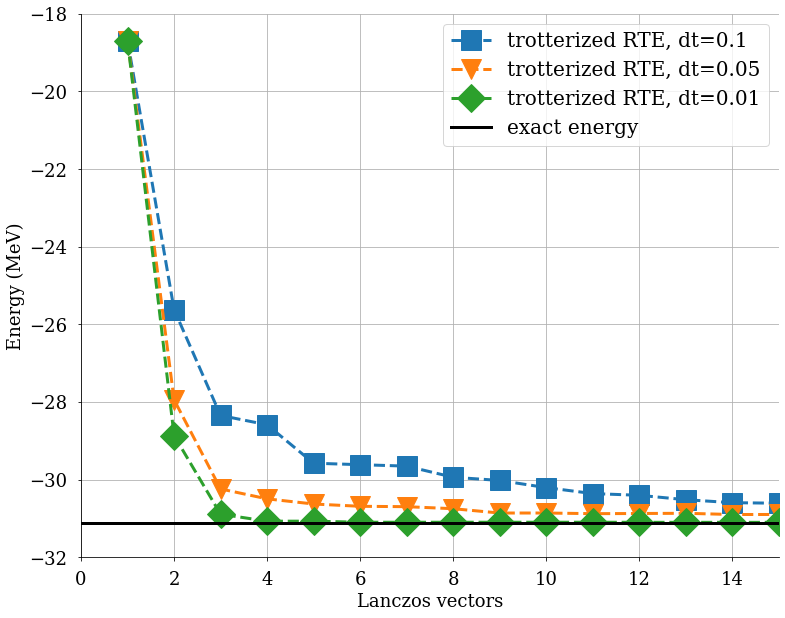

In [28]:
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.rcParams.update({'font.size': 20})
plt.grid()

#t_nbstates1 = np.linspace(1,cnvg_energies1,cnvg_energies1)
#t_nbstates2 = np.linspace(1,cnvg_energies2,cnvg_energies2)
#t_nbstates3 = np.linspace(1,cnvg_energies3,cnvg_energies3)
#t_nbstates4 = np.linspace(1,cnvg_energies4,cnvg_energies3)

t_nbstates = np.linspace(1,nsteps,nsteps)

plt.plot(t_nbstates,energies1[:,elevel],marker='s',markersize=20,linewidth=3,linestyle='dashed')
plt.plot(t_nbstates,energies2[:,elevel],marker='v',markersize=20,linewidth=3,linestyle='dashed')
plt.plot(t_nbstates,energies3[:,elevel],marker='D',markersize=20,linewidth=3,linestyle='dashed')
#plt.plot(t_nbstates,energies4[:,elevel],marker='o',markersize=20,linewidth=3,linestyle='dashed')

plt.axhline(y=exact_energy, color='k', linestyle='-',linewidth=3)
plt.xlabel('Lanczos vectors')
plt.ylabel('Energy (MeV)')
plt.rcParams['figure.figsize'] = [12.5, 10]

plt.xlim([0,15])
plt.ylim([-32, -18])
plt.legend(['trotterized RTE, dt=0.1', 'trotterized RTE, dt=0.05','trotterized RTE, dt=0.01','exact energy'], loc='upper right', numpoints=1)

plt.savefig('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Ionel_code/plots/timestep_%s%s_%selevel_%srefstates.png'%(basis,evo,str(elevel),str(nref)), facecolor='white', edgecolor='none', dpi=300, bbox_inches='tight')
    